<a href="https://colab.research.google.com/github/mbozzore/LFT/blob/master/astronnv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Petit essai
`$\sqrt{3x-1}+(1+x)^2$` becomes
$\sqrt{3x-1}+(1+x)^2.$

In [ ]:
!pip install sklearn astroNN tensorflow==1.15

Galaxy10.h5:   0%|          | 16.4k/210M [00:00<26:57, 130kB/s]

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


Galaxy10.h5:  98%|█████████▊| 207M/210M [00:04<00:00, 85.9MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:05, 40.7MB/s]                           


===================Data Inspection===================


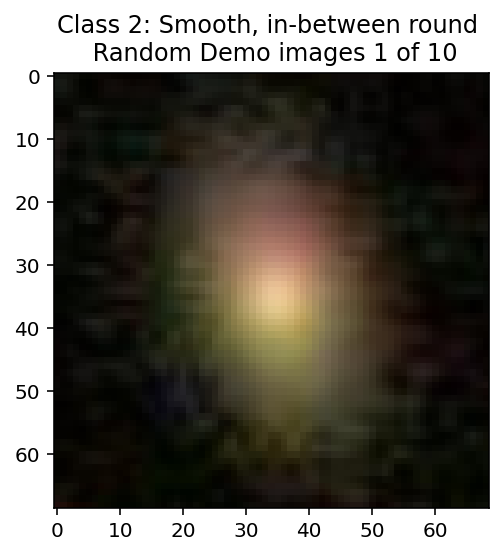

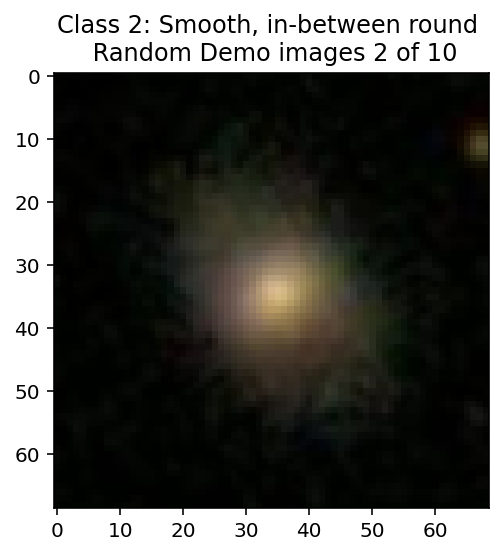

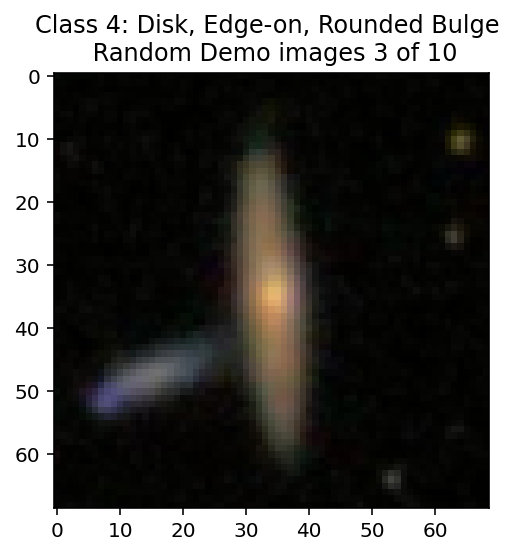

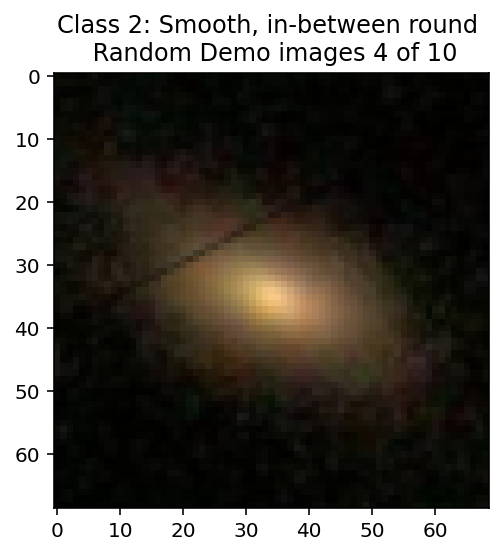

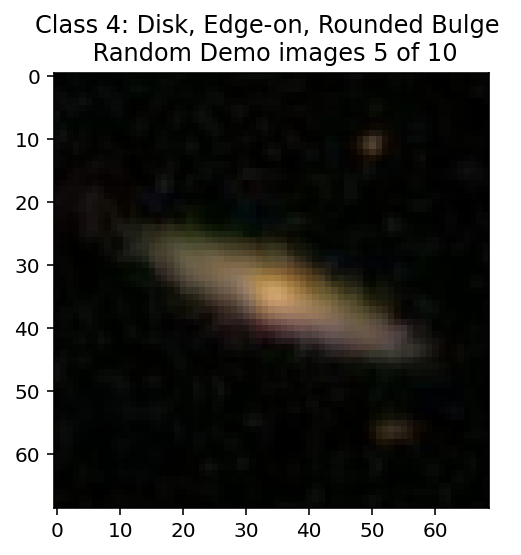

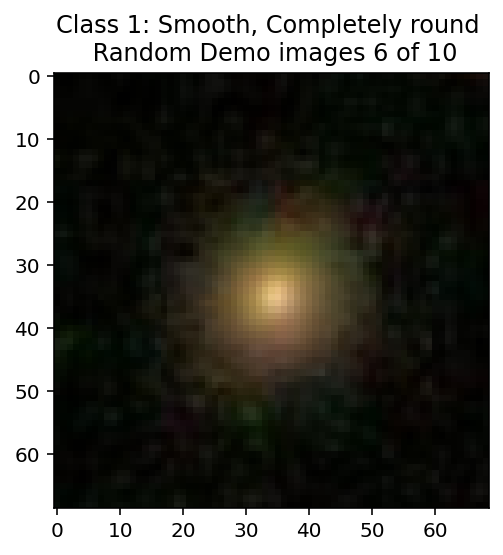

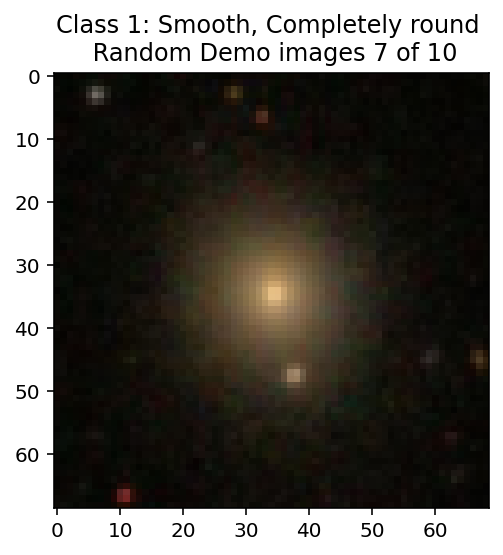

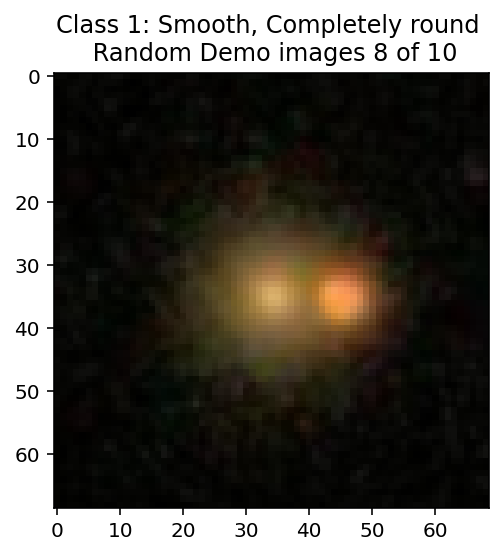

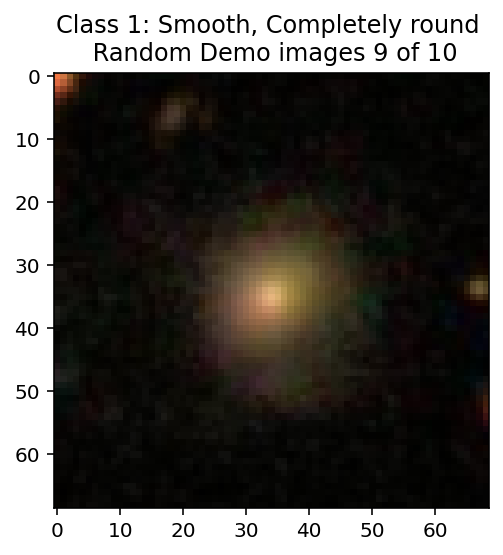

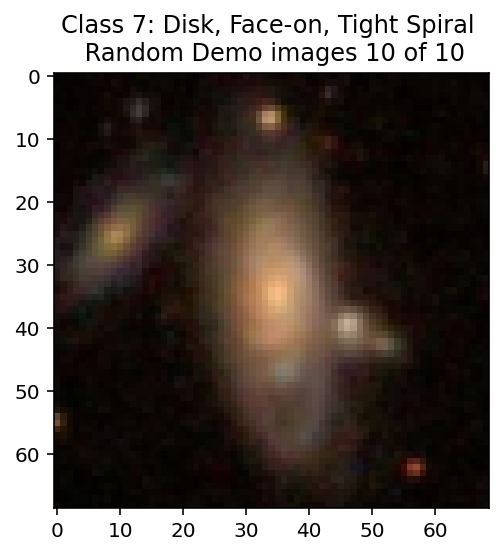

===============Data Inspection Finished===============



Number of Training Data: 17646, Number of Validation Data: 1960
====Message from Normalizer====
You selected mode: 255
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
Epoch 1/5
275/275 - 89s - loss: 1.9322 - categorical_accuracy: 0.3709 - val_loss: 1.4193 - val_categorical_accuracy: 0.4370
Epoch 2/5
Epoch 1/5
275/275 - 86s - loss: 1.3718 - categorical_accuracy: 0.4882 - val_loss: 0.8971 - val_categorical_accuracy: 0.5147
Epoch 3/5
Epoch 1/5
275/275 - 83s - loss: 1.2838 - categorical_accuracy:

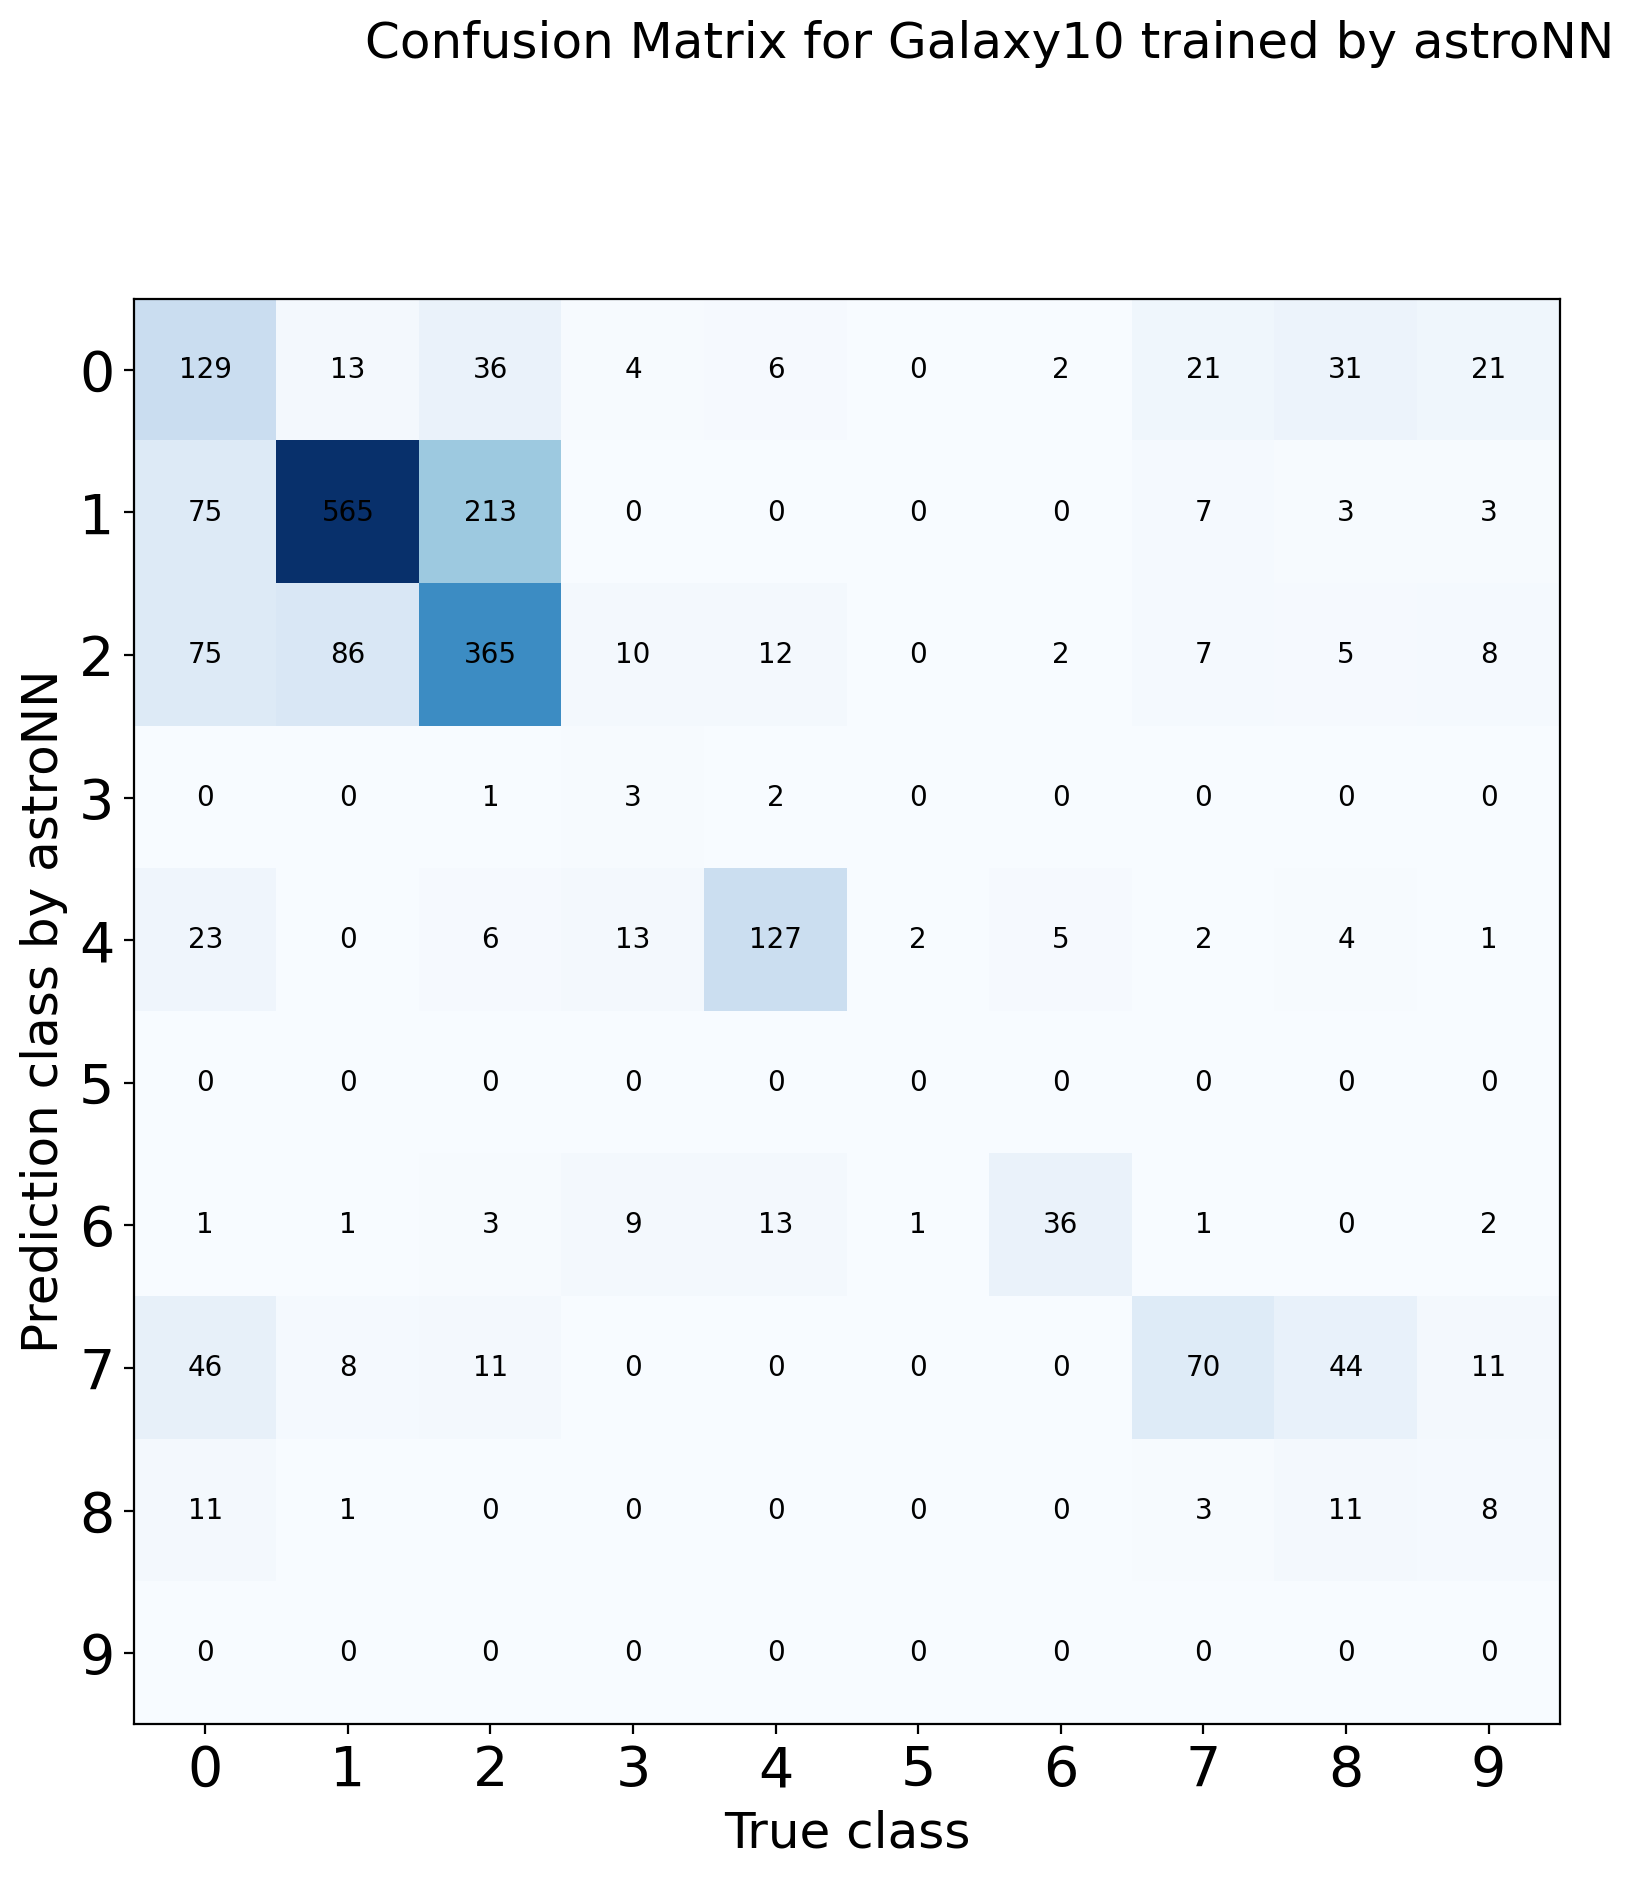

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# import everything we need first
from tensorflow.keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
import pylab as plt

from astroNN.models import Galaxy10CNN
from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup, galaxy10_confusion

# To load images and labels (will download automatically at the first time)
# First time downloading location will be ~/.astroNN/datasets/
images, labels = galaxy10.load_data()

# To convert the labels to categorical 10 classes
labels = utils.to_categorical(labels, 10)

# Select 10 of the images to inspect
img = None
plt.ion()
print('===================Data Inspection===================')
for counter, i in enumerate(range(np.random.randint(0, labels.shape[0], size=10).shape[0])):
    img = plt.imshow(images[i])
    plt.title('Class {}: {} \n Random Demo images {} of 10'.format(np.argmax(labels[i]), galaxy10cls_lookup(labels[i]), counter+1))
    plt.draw()
    plt.pause(2.)
plt.close('all')
print('===============Data Inspection Finished===============')

# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

# Split the dataset into training set and testing set
train_idx, test_idx = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_idx], labels[train_idx], images[test_idx], labels[test_idx]

# To create a neural network instance
galaxy10net = Galaxy10CNN()
# set maximium epochs the neural network can run, set 5 to get quick result
galaxy10net.max_epochs = 5

# To train the nerual net
# astroNN will normalize the data by default
galaxy10net.train(train_images, train_labels)

# print model summary before training
galaxy10net.keras_model.summary()

# After the training, you can test the neural net performance
# Please notice predicted_labels are labels predicted from neural network. test_labels are ground truth from the dataset
predicted_labels = galaxy10net.test(test_images)

# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)

# Convert test_labels to class
test_class = np.argmax(test_labels, axis=1)

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)


Number of Training Data: 17646, Number of Validation Data: 1960
====Message from Normalizer====
You selected mode: 255
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
Epoch 1/15
Epoch 1/15
275/275 - 93s - loss: 10.9596 - categorical_accuracy: 0.3224 - val_loss: 11.1189 - val_categorical_accuracy: 0.3135
Epoch 2/15
Epoch 1/15
275/275 - 88s - loss: 10.9455 - categorical_accuracy: 0.3234 - val_loss: 11.0921 - val_categorical_accuracy: 0.3135
Epoch 3/15
Epoch 1/15
275/275 - 87s - loss: 10.9281 - categorical_accuracy: 0.3233 - val_loss: 11.0798 - val_categorical_accuracy: 0.3135
Epoch 4/15
Epoch 1/15
275/275 - 86s - loss: 3.3005 - categorical_accuracy: 0.3419 - val_loss: 1.6496 - val_categorical_accuracy: 0.3651
Epoch 5/15
Epoch 1/15
27

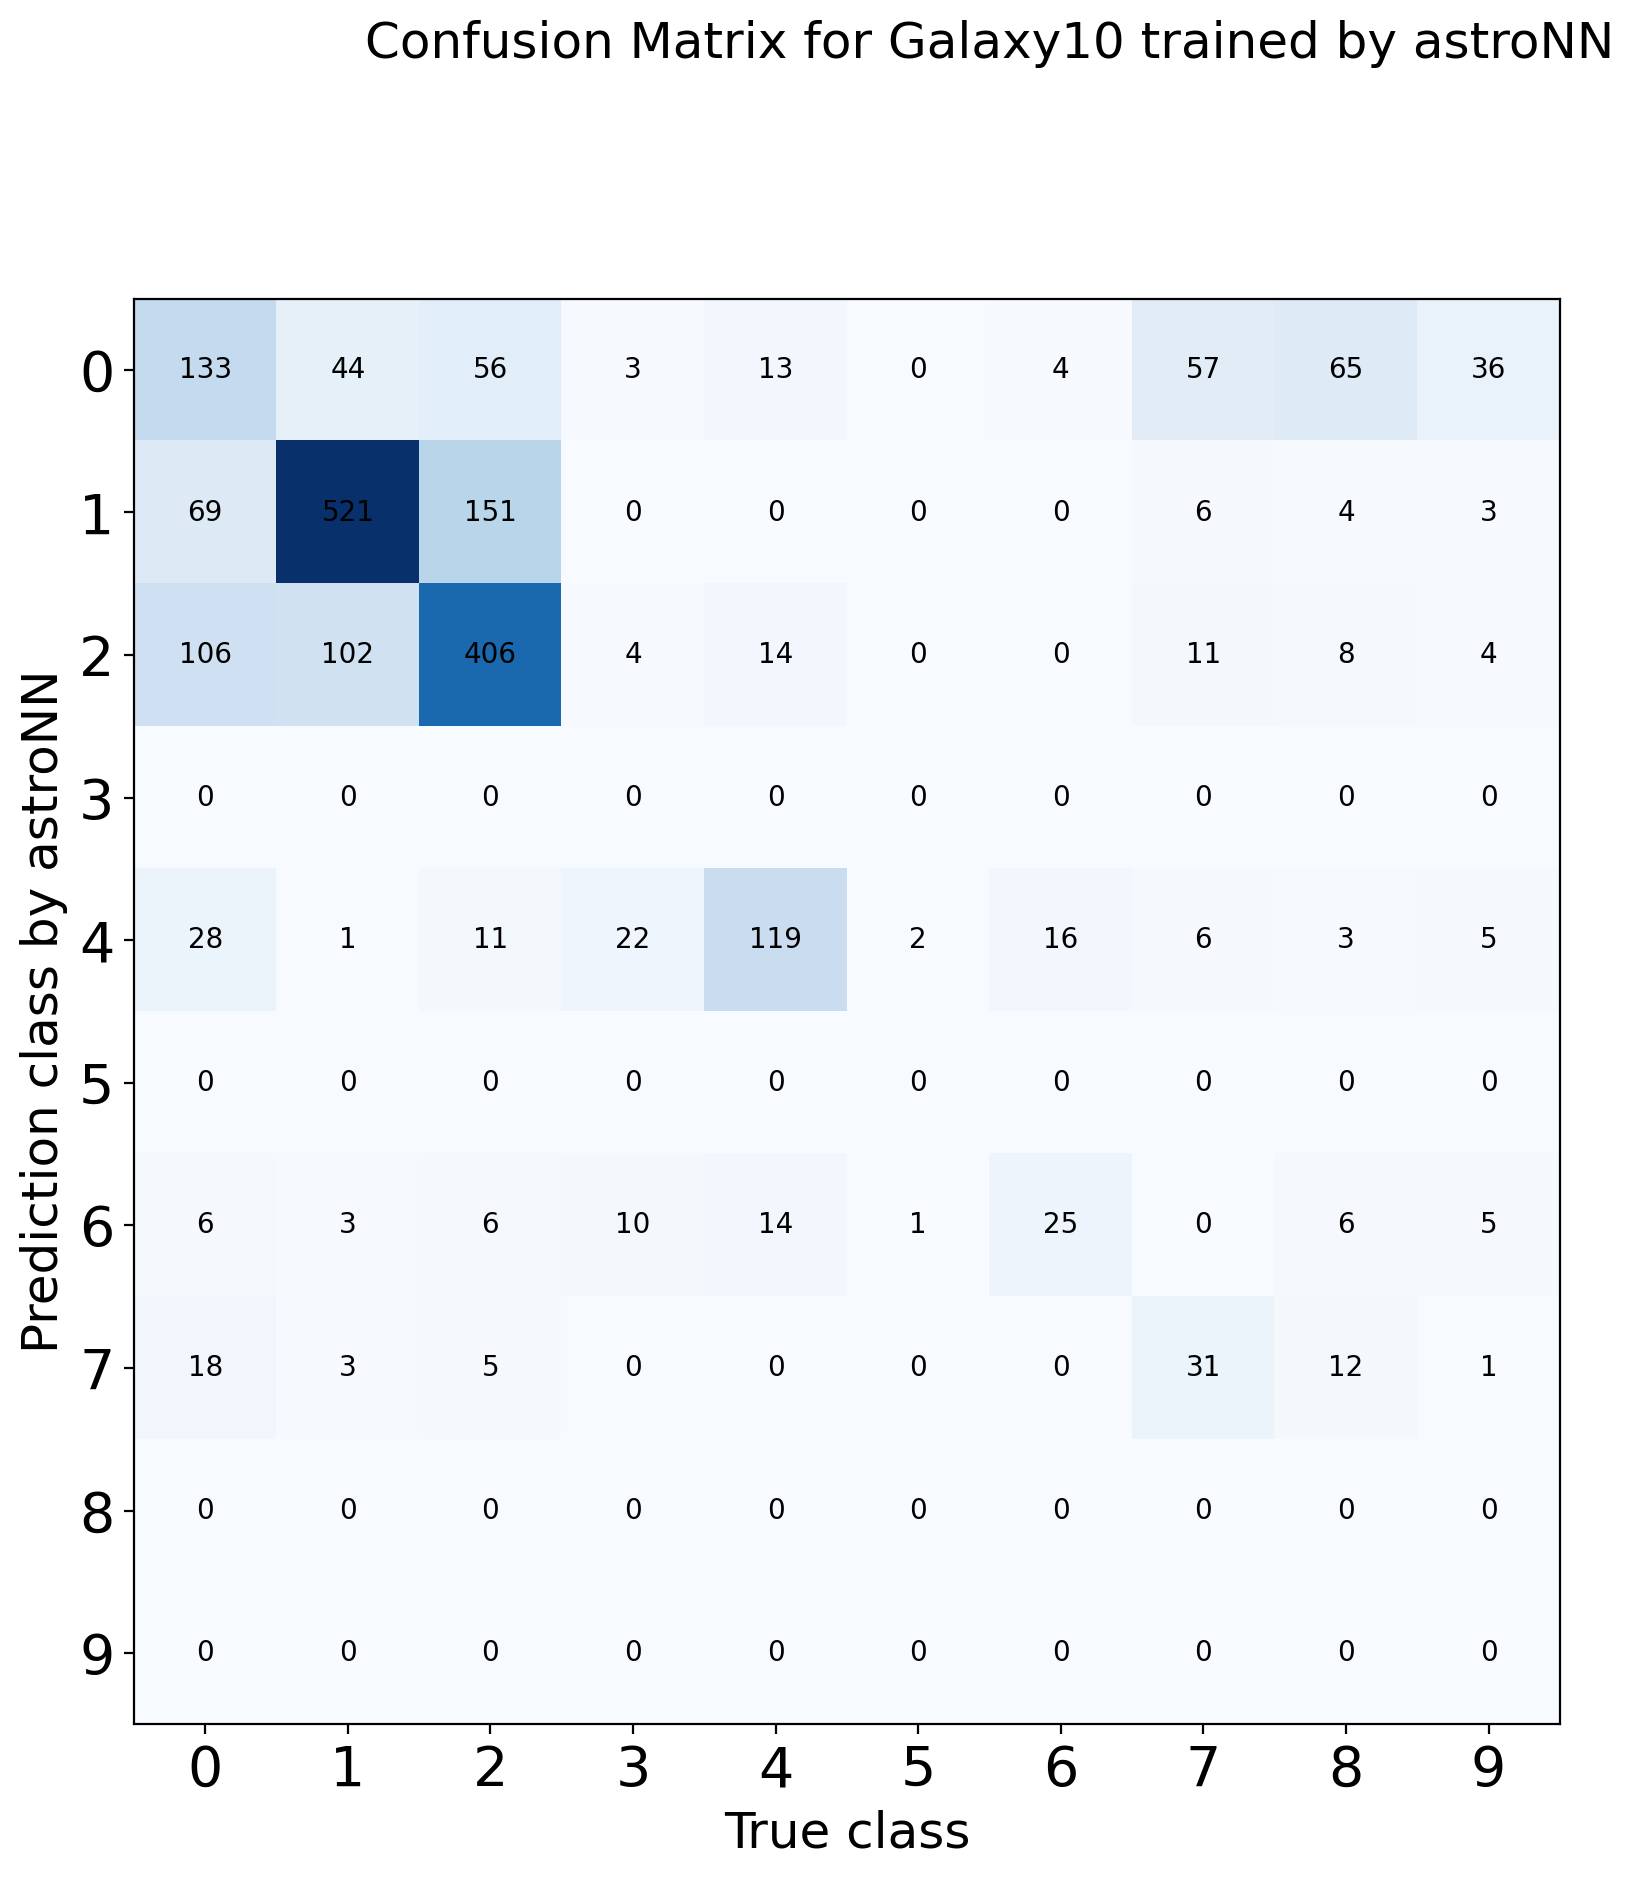

In [3]:
# To create a neural network instance
galaxy10net = Galaxy10CNN()
# set maximium epochs the neural network can run, set 5 to get quick result
galaxy10net.max_epochs = 15

# To train the nerual net
# astroNN will normalize the data by default
galaxy10net.train(train_images, train_labels)

# print model summary before training
galaxy10net.keras_model.summary()

# After the training, you can test the neural net performance
# Please notice predicted_labels are labels predicted from neural network. test_labels are ground truth from the dataset
predicted_labels = galaxy10net.test(test_images)

# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)

# Convert test_labels to class
test_class = np.argmax(test_labels, axis=1)

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)

Number of Training Data: 17646, Number of Validation Data: 1960
====Message from Normalizer====
You selected mode: 255
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
====Message from Normalizer====
You selected mode: 0
Featurewise Center: False
Datawise Center: False
Featurewise std Center: False
Datawise std Center: False
====Message ends====
Epoch 1/50
Epoch 1/50
275/275 - 99s - loss: 2.5595 - categorical_accuracy: 0.3663 - val_loss: 1.4058 - val_categorical_accuracy: 0.4443
Epoch 2/50
Epoch 1/50
275/275 - 86s - loss: 1.3566 - categorical_accuracy: 0.4795 - val_loss: 1.2678 - val_categorical_accuracy: 0.4969
Epoch 3/50
Epoch 1/50
275/275 - 87s - loss: 1.2574 - categorical_accuracy: 0.5306 - val_loss: 1.1621 - val_categorical_accuracy: 0.5844
Epoch 4/50
Epoch 1/50
275/275 - 86s - loss: 1.1751 - categorical_accuracy: 0.5847 - val_loss: 0.9888 - val_categorical_accuracy: 0.6328
Epoch 5/50
Epoch 1/50
275/275 

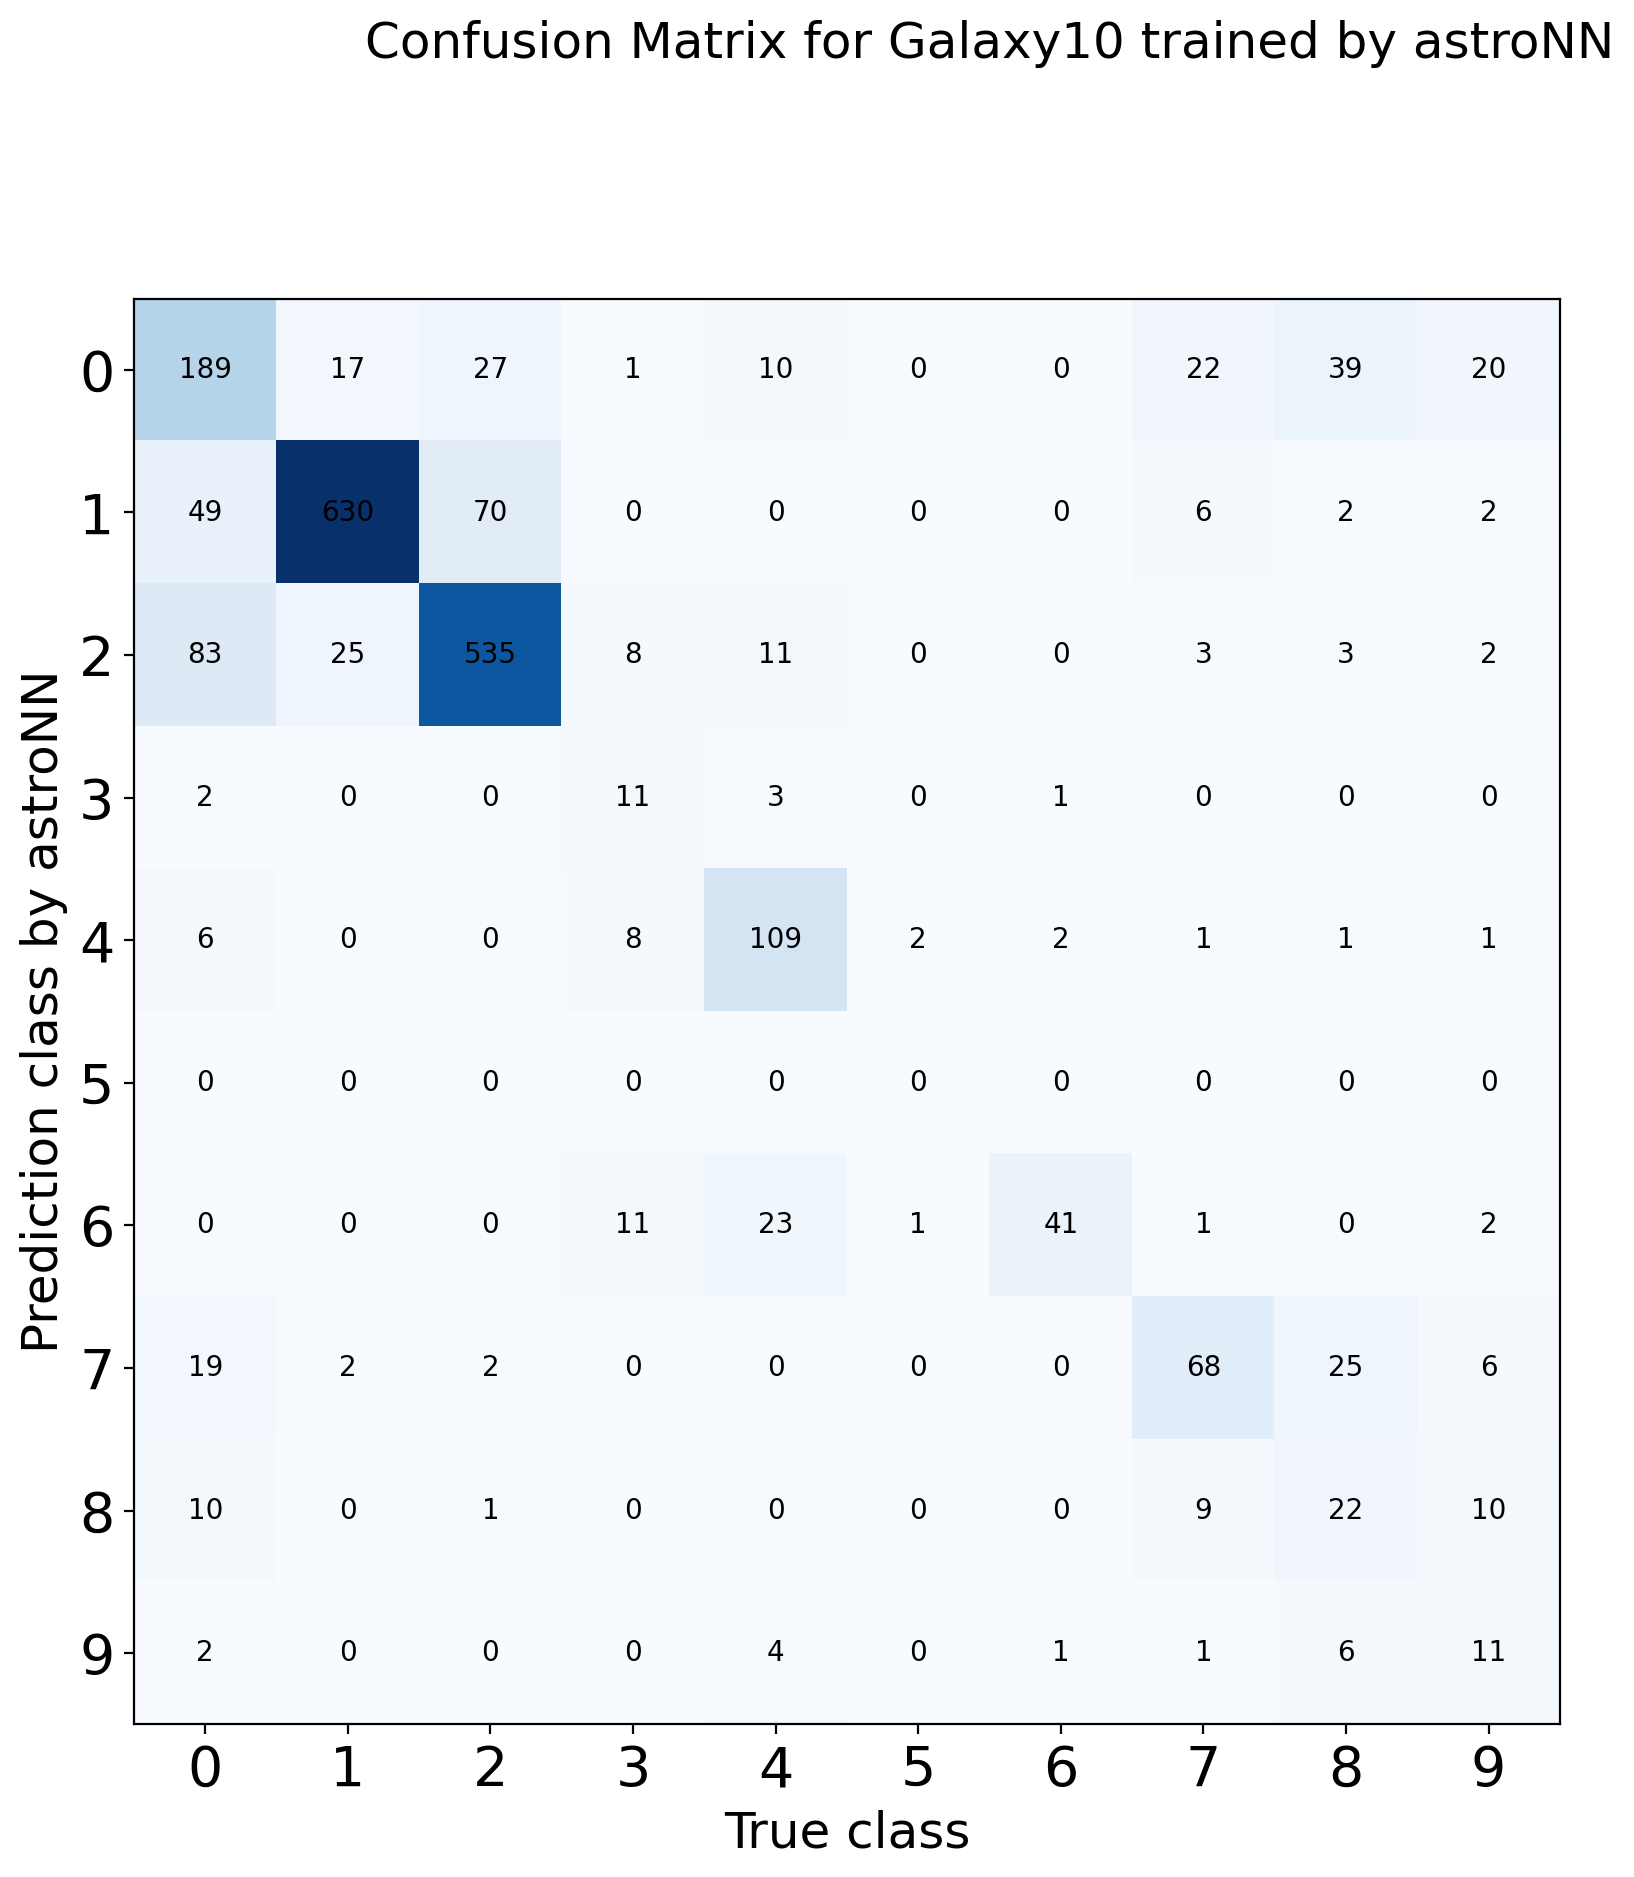

In [4]:
# To create a neural network instance
galaxy10net = Galaxy10CNN()
# set maximium epochs the neural network can run, set 5 to get quick result
galaxy10net.max_epochs = 50

# To train the nerual net
# astroNN will normalize the data by default
galaxy10net.train(train_images, train_labels)

# print model summary before training
galaxy10net.keras_model.summary()

# After the training, you can test the neural net performance
# Please notice predicted_labels are labels predicted from neural network. test_labels are ground truth from the dataset
predicted_labels = galaxy10net.test(test_images)

# Convert predicted_labels to class
prediction_class = np.argmax(predicted_labels, axis=1)

# Convert test_labels to class
test_class = np.argmax(test_labels, axis=1)

# Prepare a confusion matrix
confusion_matrix = np.zeros((10,10))

# create the confusion matrix
for counter, i in enumerate(prediction_class):
    confusion_matrix[i, test_class[counter]] += 1

# Plot the confusion matrix
galaxy10_confusion(confusion_matrix)